# Plotting the Housing Data

A good first step when working with any new data set is to do some exploratory data analysis, starting with a plots of the data. Let's download the data. There is some information about the [data set](https://archive.ics.uci.edu/ml/datasets/Housing) at the UCI ML repository. It's a good idea to take a look at the dataset description before proceeding.

In [1]:
%matplotlib inline

# Download the data, save to a file called "housing.data"
import urllib
data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
urllib.urlretrieve (data_url, "housing.data")

('housing.data', <httplib.HTTPMessage instance at 0x10ae098c0>)

The data file does not contain the column names in the first line, so we'll need to add those in manually. You can find the names and explanations [here](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names). We've extracted the names below for convenience.

In [2]:
names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
         "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per USD 10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. MEDV: Median value of owner-occupied homes in $1000's

## Loading the Data

Now let's use pandas to load the data into a data frame. Note that the data is space separated (rather than the more common comma separated data). Here are the first few lines:

```
0.00632  18.00   2.310  0  0.5380  6.5750  65.20  4.0900   1  296.0  15.30 396.90   4.98  24.00
0.02731   0.00   7.070  0  0.4690  6.4210  78.90  4.9671   2  242.0  17.80 396.90   9.14  21.60
```

In [6]:
import pandas as pd

data = pd.read_csv("housing.data", header=None, names=names, delim_whitespace=True)

# Take a look at the first few rows
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Knowledge Check:

How many rows are in the dataset?

In [7]:
# Compute the number of rows
data.index

RangeIndex(start=0, stop=506, step=1)

## Plotting the Data

We are interested in the house values, given in column "MEDV" as a target for modeling. By plotting each of the other columns against "MEDV" we can get a sense of which variables may be correlated.

There are many ways we can plot the data, using `pandas`, `matplotlib`, or `seaborn`. In any case, it's nice to import `seaborn` for the improved styling. Let's try using `pandas` first to make a scatter plot of crime (column "CRIM") versus house value ("MEDV").

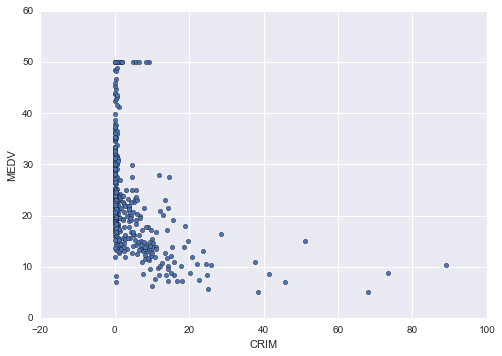

In [8]:
import seaborn as sns

# Plot using pandas
data.plot.scatter(x='CRIM', y='MEDV')

It looks like there is a relationship. While houses in low crime areas can have a wide range of values, houses in high crime areas appear to have lower values.

Knowledge checks:
* How do we select a column of data from a pandas DataFrame?
* Let's make the same plot with matplotlib.

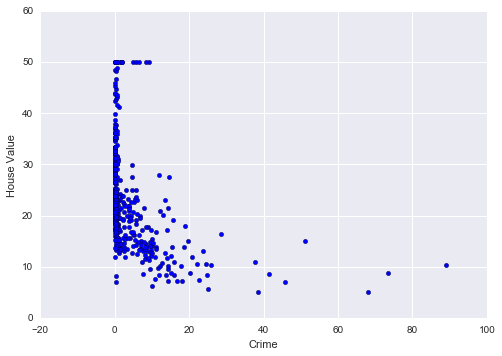

In [9]:
# Knowledge Check Solution
from matplotlib import pyplot as plt

# Plot using matplotlib
plt.scatter(data["CRIM"], data["MEDV"])
plt.xlabel("Crime")
plt.ylabel("House Value")

### Exercises

Exercise 1: Using `pandas` or `matplotlib` plot the remaining variables against "MEDV" and discuss the relationships you find. Question: Which variables seem to correlate well?

### Bonus Exercises

Exercise 2: Seaborn is very handy for making plots of data for exploratory purposes. Try using `seaborn`'s [pairplots](https://stanford.edu/~mwaskom/software/seaborn/examples/scatterplot_matrix.html) to make similar plots.

Exercise 3: Improve your plots by including units and better axis labels. You'll need to read the [data set description](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

Exercise 4: Can you find any visual correlations between two variables other than MEDV?

In [11]:
#Exercise 1: Using pandas or matplotlib plot the remaining variables against "MEDV" 
#and discuss the relationships you find. Question: Which variables seem to correlate well?

In [12]:
data.columns

Index([u'CRIM', u'ZN', u'INDUS', u'CHAS', u'NOX', u'RM', u'AGE', u'DIS',
       u'RAD', u'TAX', u'PTRATIO', u'B', u'LSTAT', u'MEDV'],
      dtype='object')

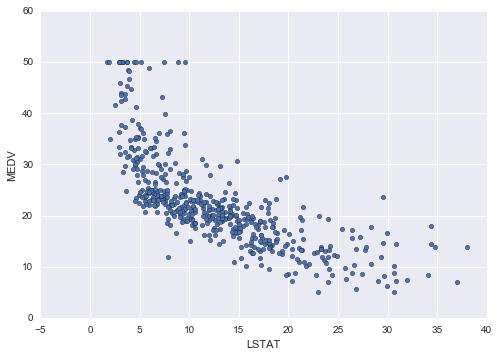

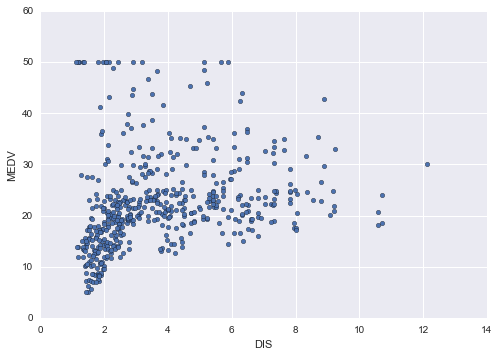

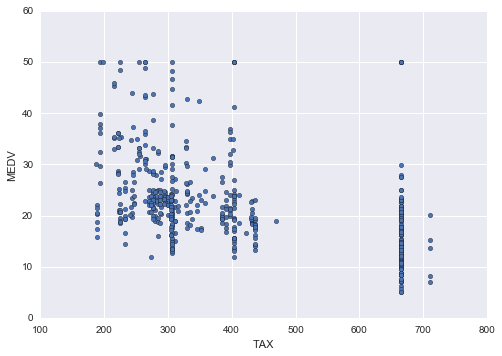

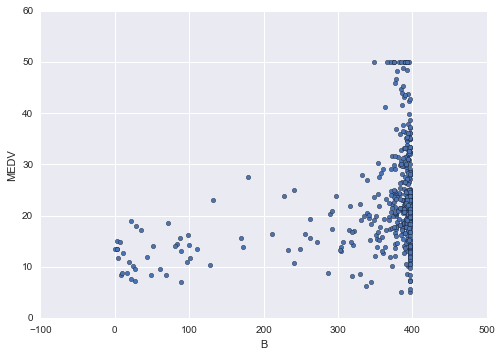

In [17]:
data.plot.scatter(x='LSTAT', y='MEDV')
data.plot.scatter(x='DIS', y='MEDV')
data.plot.scatter(x='TAX', y='MEDV')
data.plot.scatter(x='B', y='MEDV')

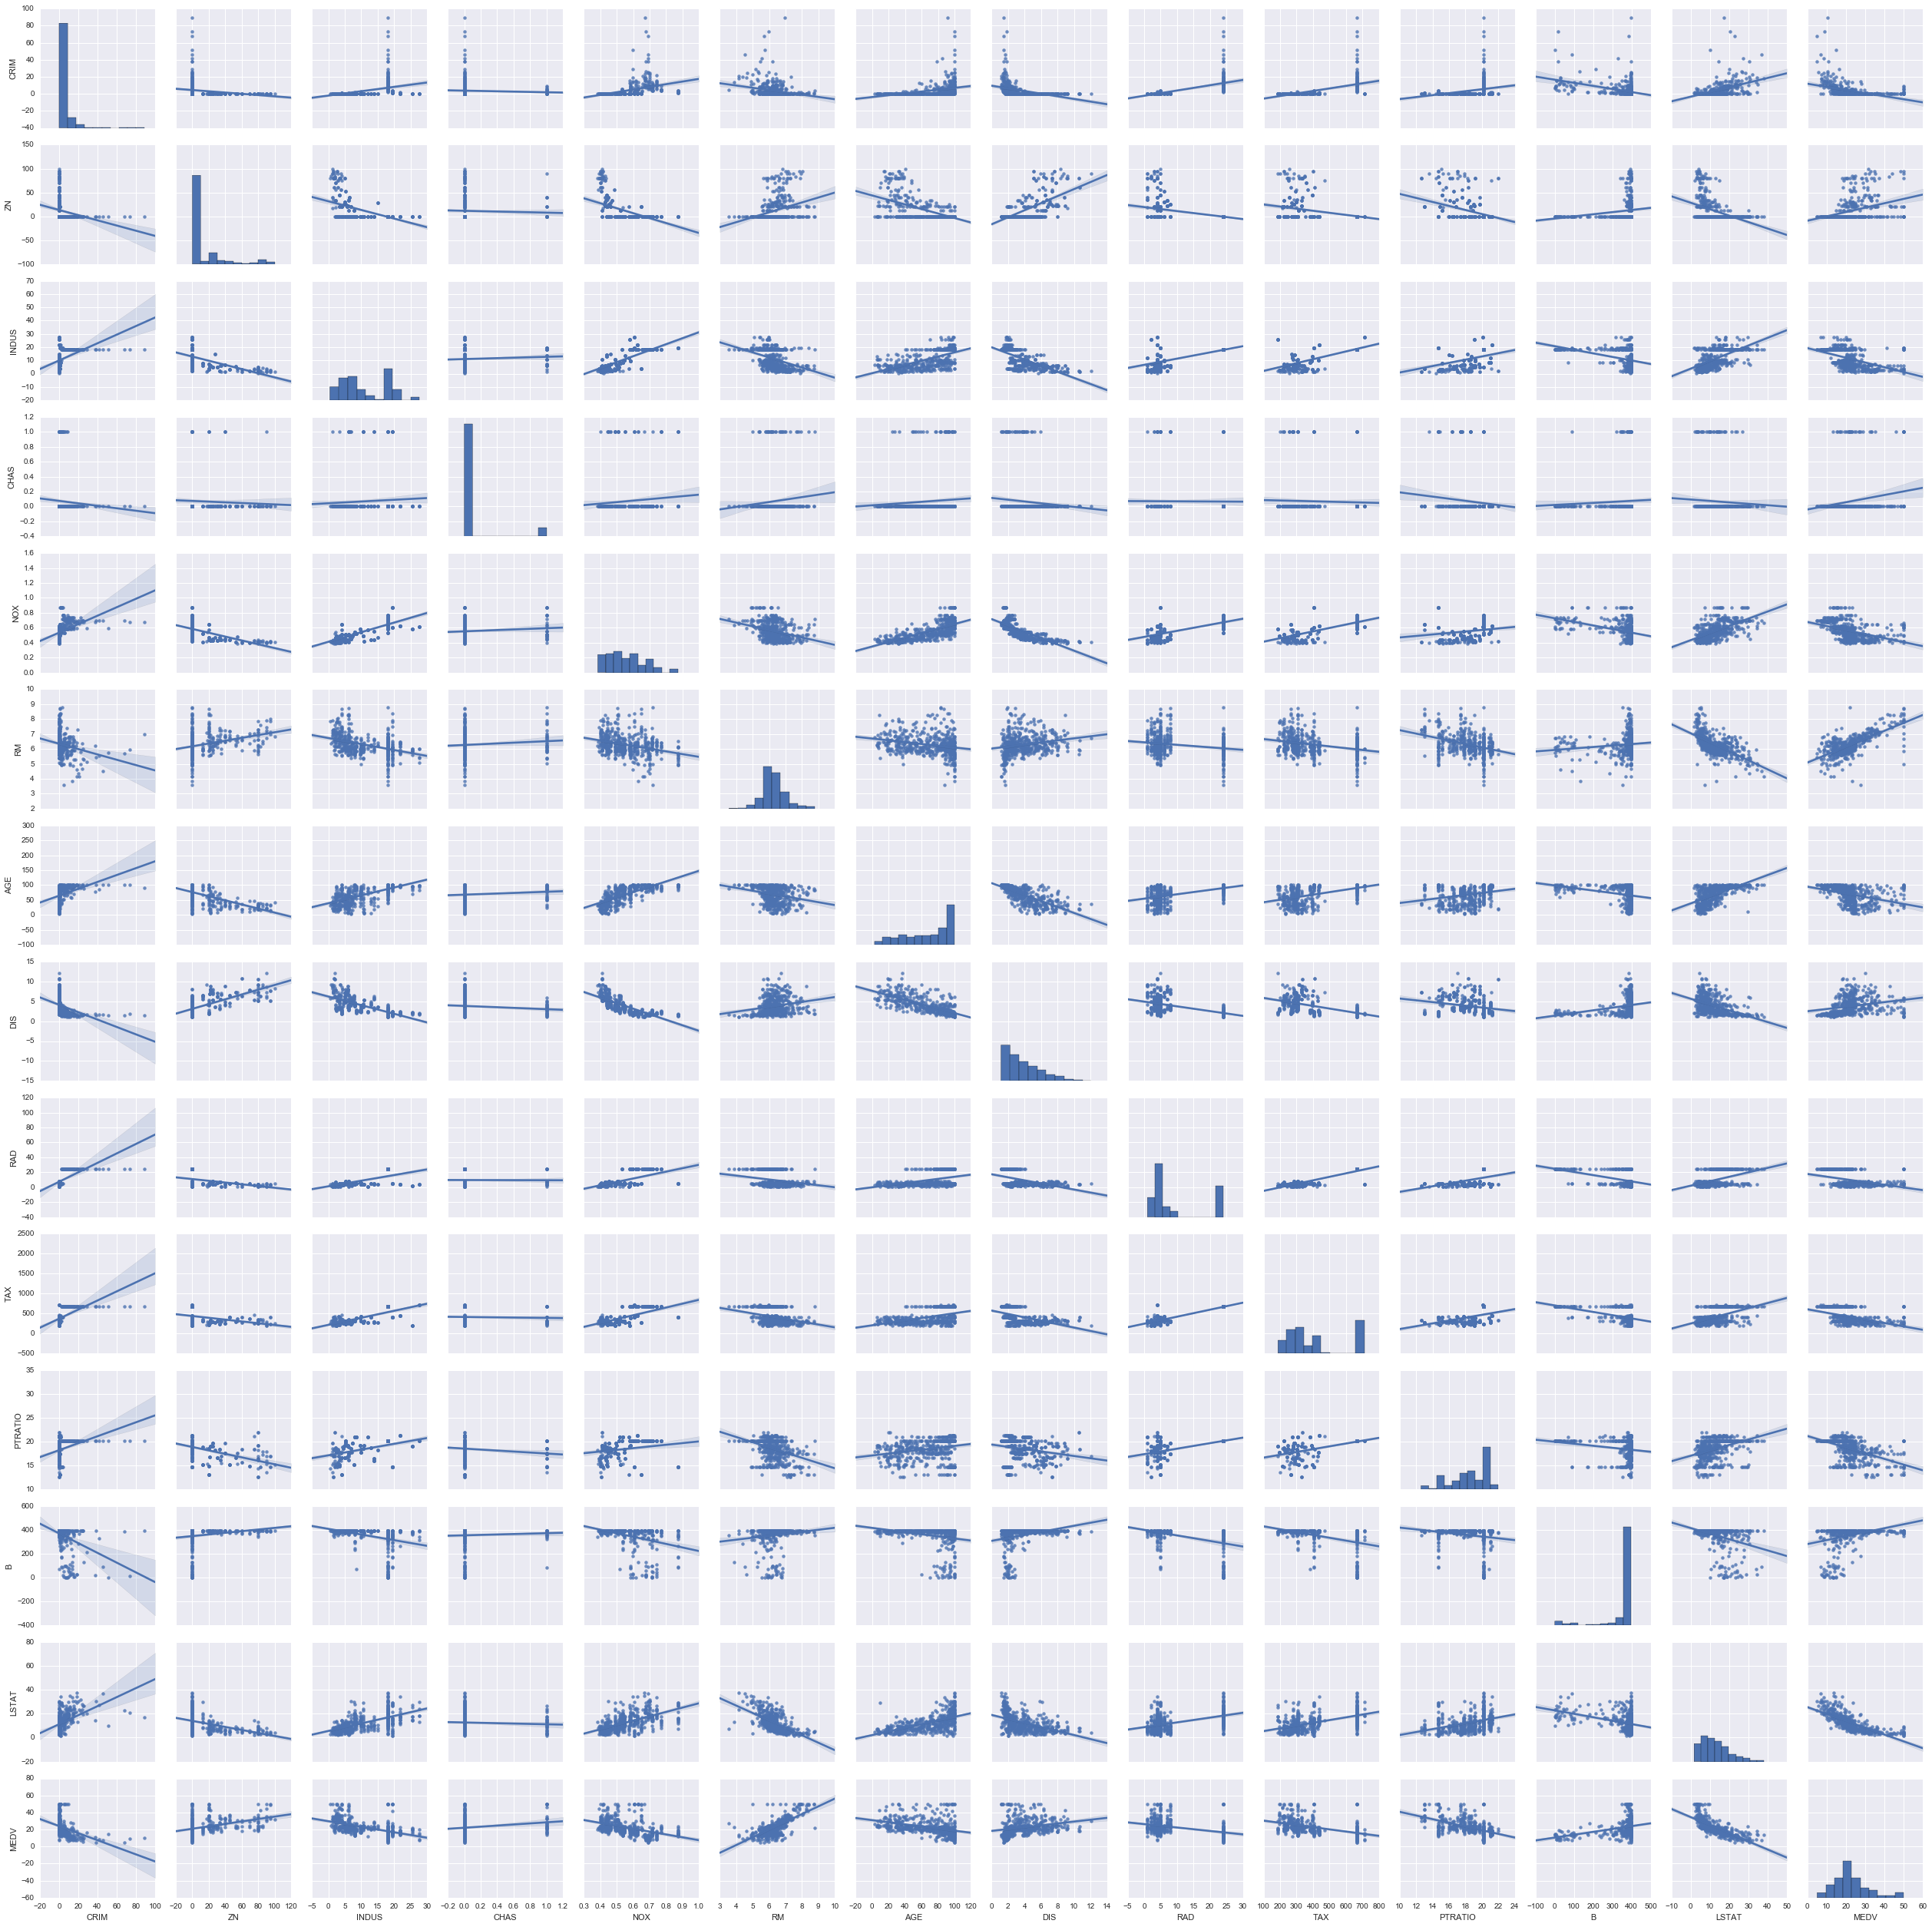

In [18]:
#Exercise 2: Seaborn is very handy for making plots of data for exploratory purposes. 
#Try using `seaborn`'s [pairplots](https://stanford.edu/~mwaskom/software/seaborn/examples/scatterplot_matrix.html) 
#to make similar plots

sns.pairplot(data, kind="reg")


1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per USD 10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. MEDV: Median value of owner-occupied homes in $1000's

In [21]:
data.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.9,9.14,21.6


In [41]:
new_data = data.loc[:, ['TAX', 'B', 'LSTAT', 'MEDV']]

In [42]:
new_data.head()

,TAX,B,LSTAT,MEDV
0,296.0,396.90,4.98,24.0
1,242.0,396.90,9.14,21.6
2,242.0,392.83,4.03,34.7
3,222.0,394.63,2.94,33.4
4,222.0,396.90,5.33,36.2


In [35]:
new_data = data.iloc[0:-1, [0, 6, 8, 10, 11, 12]]

In [39]:
new_data.head()

,CRIM,DIS,TAX,B,LSTAT,MEDV
0,0.00632,4.0900,296.0,396.90,4.98,24.0
1,0.02731,4.9671,242.0,396.90,9.14,21.6
2,0.02729,4.9671,242.0,392.83,4.03,34.7
3,0.03237,6.0622,222.0,394.63,2.94,33.4
4,0.06905,6.0622,222.0,396.90,5.33,36.2


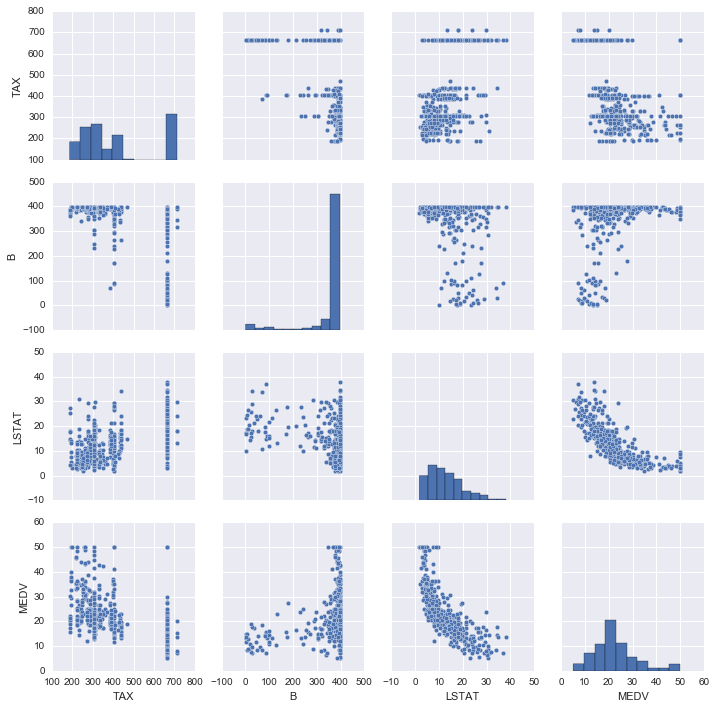

In [43]:
sns.pairplot(new_data)

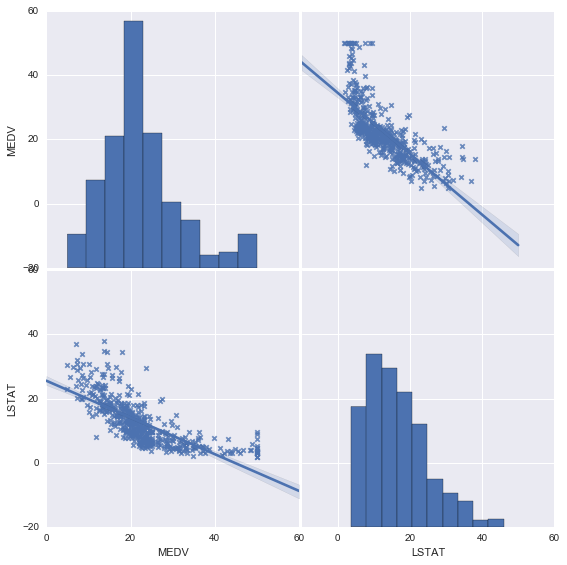

In [74]:
g = sns.pairplot(new_data, kind='reg', vars=['MEDV', 'LSTAT'], size=4, markers='x')
g.set(xticks=[0,20,40,60], yticks=[-20, 0, 20, 40, 60])
g.fig.subplots_adjust(wspace=.01, hspace=.01)

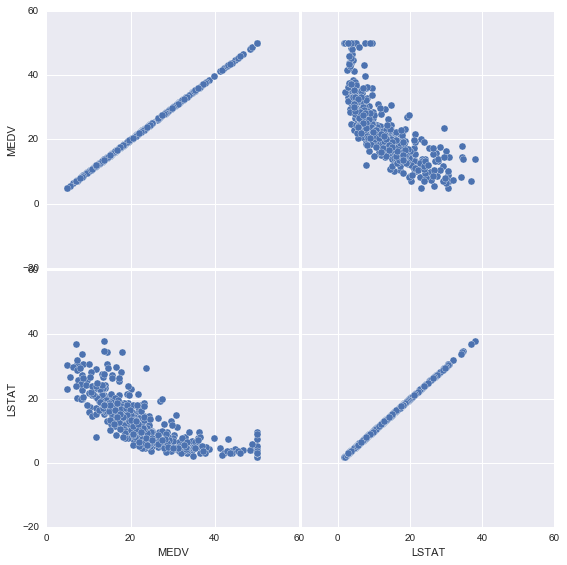

In [79]:
g = sns.PairGrid(new_data, vars=['MEDV', 'LSTAT'], size=4)
g.map(plt.scatter, s=50, edgecolor="white")
g.set(xticks=[0,20,40,60], yticks=[-20, 0, 20, 40, 60])
g.fig.subplots_adjust(wspace=.01, hspace=.01)

In [ ]:

Exercise 3: Improve your plots by including units and better axis labels. You'll need to read the [data set description](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names).

Exercise 4: Can you find any visual correlations between two variables other than MEDV?